Imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

from scipy.stats import gumbel_r
from multiprocessing import Pool

---

Item a)

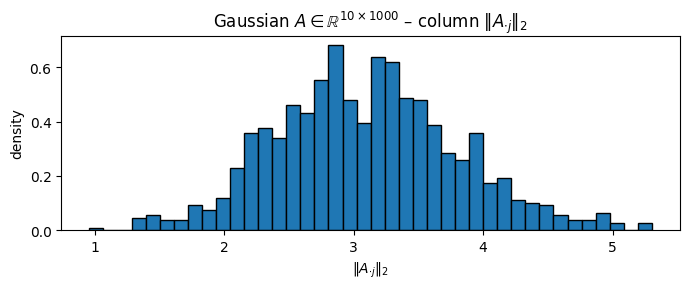

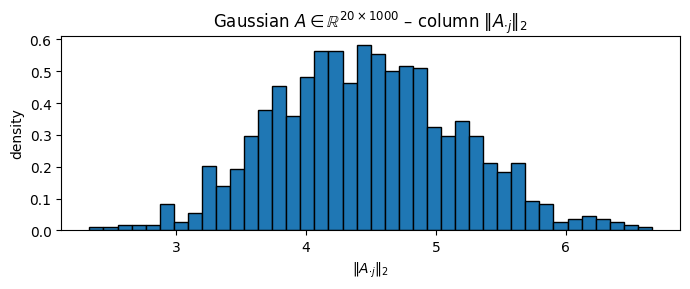

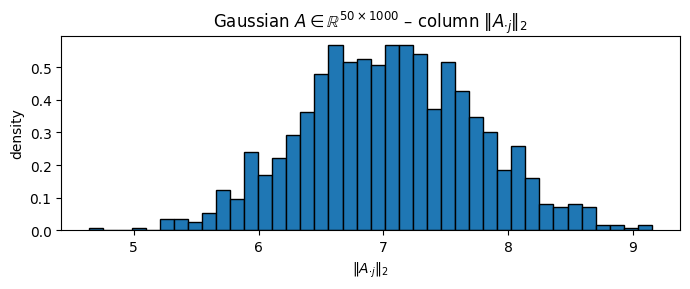

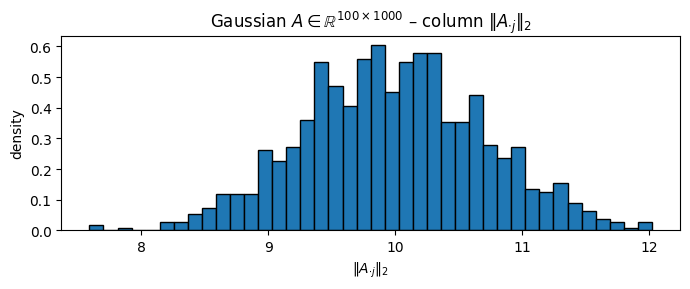

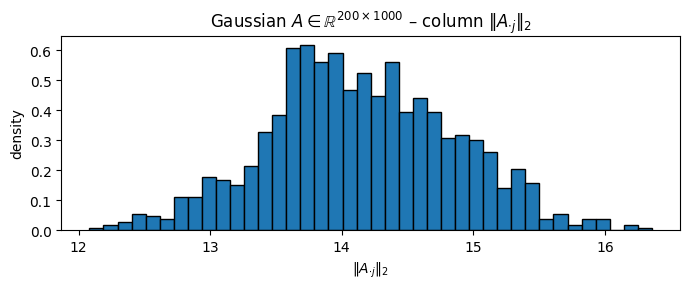

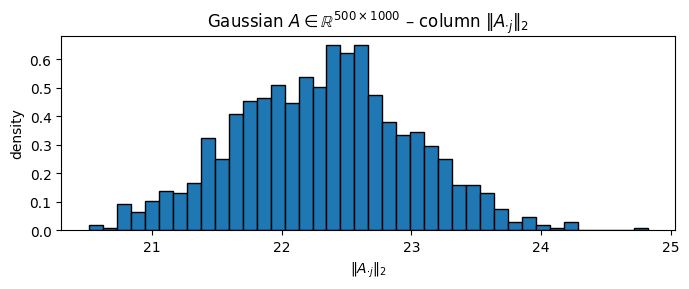

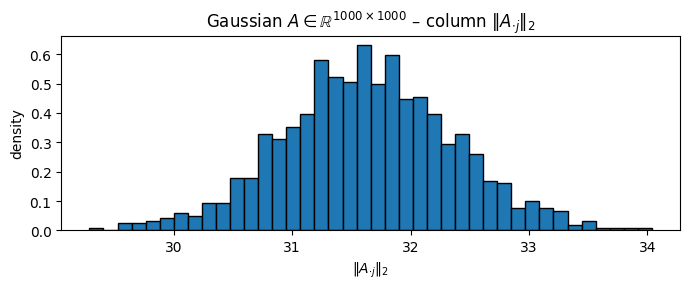

In [2]:
def _parse_int_list(prompt: str) -> list[int]:
    
    """
    Repeatedly prompt the user until they provide a non-empty list of integers.

    Args:
        prompt (str): The prompt message to display to the user.

    Returns:
        list[int]: A list of integers entered by the user.

    Raises:
        ValueError: If the user input cannot be parsed into a non-empty list of integers.
    """

    while True:
        raw = input(prompt).strip()
        try:
            values = [int(x) for x in raw.replace(";", ",").split(",") if x]
            if not values:
                raise ValueError
            return values
        except ValueError:
            print("⚠️  Please enter a comma-separated list of integers (e.g. 10,20,50).")

def _make_hists(
    m_vals: list[int],
    n_vals: list[int],
    bins: int = 40,
    density: bool = True,
    seed: int | None = None
) -> None:
    
    """
    Generate and display a histogram for each (m, n) pair, where each histogram shows the distribution
    of column 2-norms of a random Gaussian matrix of shape (m, n).

    Args:
        m_vals (list[int]): List of row counts (m values) for the matrices.
        n_vals (list[int]): List of column counts (n values) for the matrices.
        bins (int, optional): Number of bins for the histogram. Defaults to 40.
        density (bool, optional): If True, plot probability density instead of count. Defaults to True.
        seed (int | None, optional): Random seed for reproducibility. Defaults to None.

    Returns:
        None

    Raises:
        ValueError: If m_vals or n_vals are empty.
    """

    rng = np.random.default_rng(seed)
    for m in m_vals:
        for n in n_vals:
            norms = np.linalg.norm(rng.standard_normal((m, n)), axis=0) #draw the gaussian matrix and compute column 2-norms

            plt.figure(figsize=(7, 3)) #one figure per (m, n) to keep it readable
            plt.hist(norms, bins=bins, density=density, edgecolor="black")
            plt.title(rf"Gaussian $A\in\mathbb{{R}}^{{{m}\times {n}}}$ – column $\|A_{{\cdot j}}\|_2$")
            plt.xlabel(r"$\|A_{\cdot j}\|_2$")
            plt.ylabel("density" if density else "count")
            plt.tight_layout()
            plt.show()

def main() -> None:
    fix_n = input("Do you want to **fix n and vary m**? [y/n] ").strip().lower()

    if fix_n == "y":
        n = int(input("Fixed n (number of columns): ").strip())
        m_vals = _parse_int_list("List the m values (rows), comma-separated: ")
        _make_hists(m_vals, [n])

    else:
        n_vals = _parse_int_list("List the n values (columns), comma-separated: ")
        m_vals = _parse_int_list("List the m values (rows), comma-separated: ")
        _make_hists(m_vals, n_vals)

main()


---

item b)

Histograms of off-diagonal inner products for Gaussian matrices


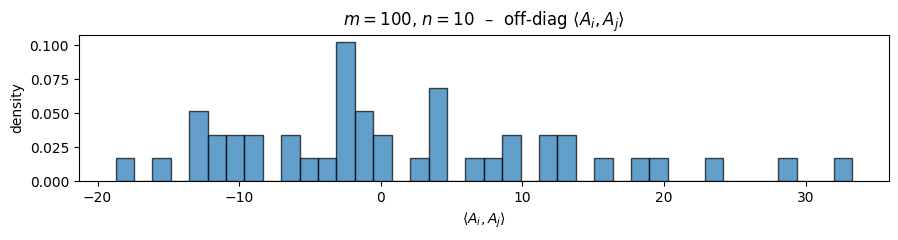

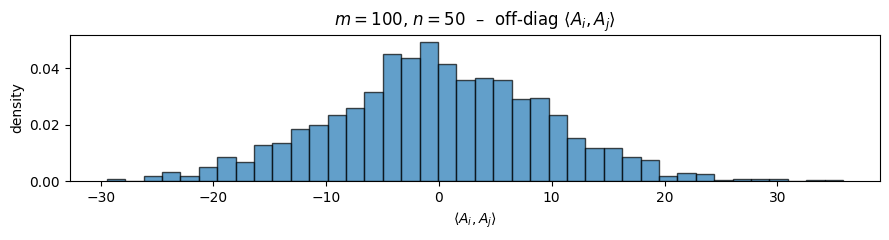

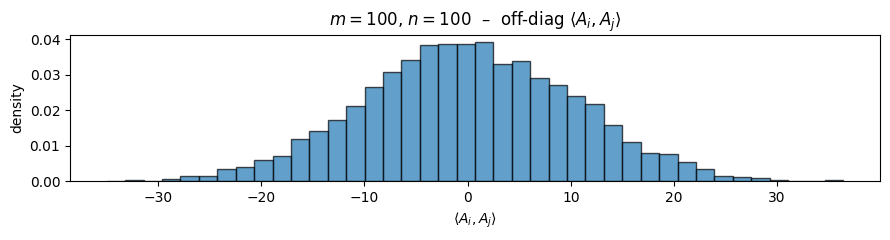

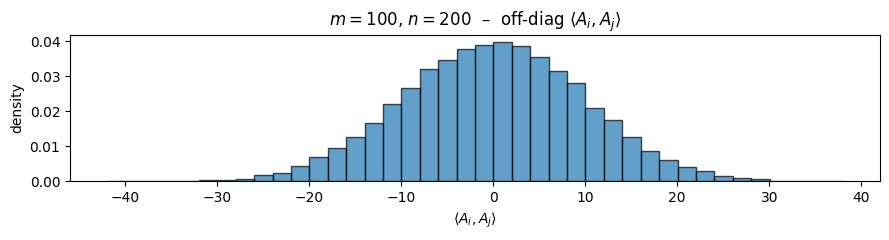

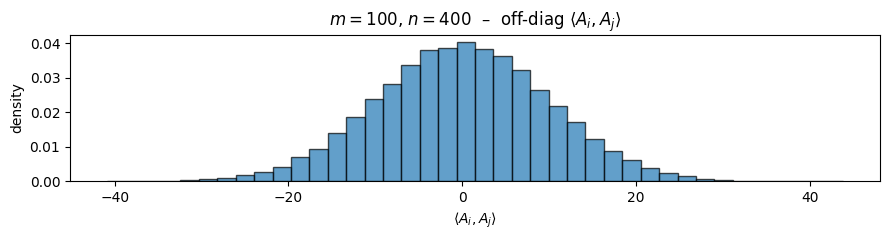

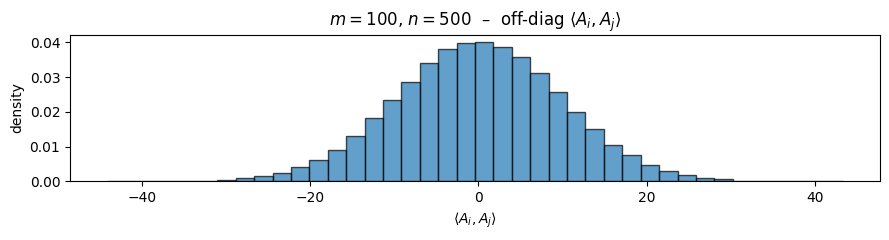

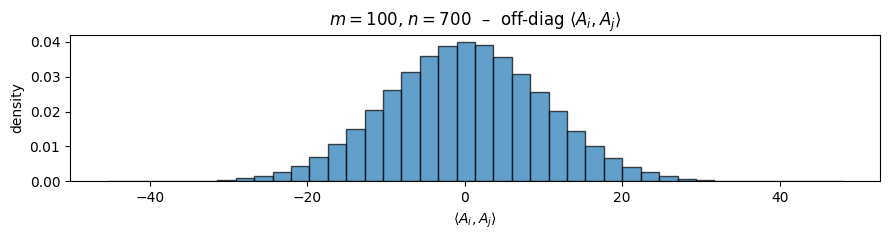

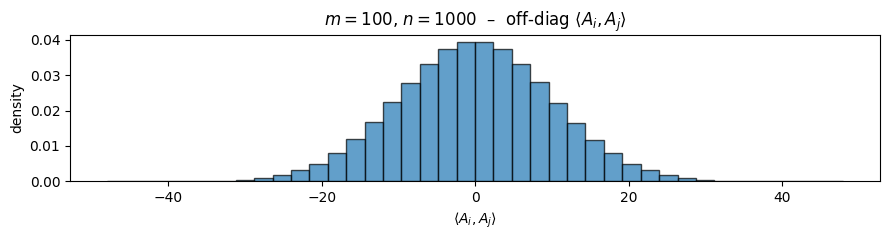

In [2]:
def _parse_int_list(prompt: str) -> list[int]:

    """
    Prompt the user repeatedly until a non-empty list of integers is provided.

    Args:
        prompt (str): The prompt message to display to the user.

    Returns:
        list[int]: A list of integers entered by the user.

    Raises:
        ValueError: If the input cannot be parsed into a non-empty list of integers.
    """

    while True:
        raw = input(prompt).strip()
        try:
            values = [int(x) for x in raw.replace(";", ",").split(",") if x]
            if not values:
                raise ValueError
            return values
        except ValueError:
            print("⚠️  Please enter a comma-separated list of integers (e.g. 10,20,50).")

def make_inner_product_hists(
    m_vals: list[int],
    n_vals: list[int],
    bins: int = 40,
    density: bool = True,
    seed: int | None = None
) -> None:
    
    """
    Generate and display histograms of off-diagonal inner products ⟨A_i, A_j⟩
    for Gaussian random matrices A ∈ R^{m×n}, for each (m, n) pair.

    Args:
        m_vals (list[int]): List of row dimensions (m values).
        n_vals (list[int]): List of column dimensions (n values).
        bins (int, optional): Number of histogram bins. Defaults to 40.
        density (bool, optional): If True, plot probability densities; if False, plot counts. Defaults to True.
        seed (int | None, optional): Random seed for reproducibility. Defaults to None.

    Returns:
        None

    Raises:
        ValueError: If m_vals or n_vals are empty or contain invalid values.
    """

    rng = np.random.default_rng(seed)
    for m in m_vals:
        for n in n_vals:
            A = rng.standard_normal((m, n))
            G = A.T @ A

            ips = G[np.triu_indices(n, k=1)]

            plt.figure(figsize=(9, 2.5))
            plt.hist(ips, bins=bins, density=density,
                     edgecolor="black", alpha=0.7)

            plt.title(fr"$m={m}$, $n={n}$  –  off-diag $\langle A_i, A_j\rangle$")
            plt.ylabel("density" if density else "count")
            plt.xlabel(r"$\langle A_i, A_j\rangle$")
            plt.tight_layout()
            plt.show()

def main() -> None:

    """
    Main interactive function to obtain user parameters and generate histograms.

    Prompts the user for matrix dimensions, histogram settings, and random seed,
    then generates and displays the corresponding histograms.

    Returns:
        None
    """

    print("Histograms of off-diagonal inner products for Gaussian matrices")

    fix_m = input("Fix m (ambient dimension)? [y/n] ").strip().lower()
    if fix_m == 'y':
        m = int(input("Fixed m: ").strip())
        m_vals = [m]
    else:
        m_vals = _parse_int_list("List m values (rows), comma-separated: ")

    fix_n = input("Fix n ? [y/n] ").strip().lower()
    if fix_n == 'y':
        n = int(input("Fixed n: ").strip())
        n_vals = [n]
    else:
        n_vals = _parse_int_list("List n values (columns), comma-separated: ")

    bins = input("Number of bins [default=40]: ").strip()
    bins = int(bins) if bins else 40

    density = input("Plot density? [y/n, default=y]: ").strip().lower()
    density = density != 'n' if density else True

    seed_str = input("Random seed (optional, press Enter to skip): ").strip()
    seed = int(seed_str) if seed_str else None

    make_inner_product_hists(
        m_vals=m_vals,
        n_vals=n_vals,
        bins=bins,
        density=density,
        seed=seed
    )

if __name__ == "__main__":
    main()

---

item c)

Running with m=100, n=300, K=100
Analyzing 100 Gaussian matrices of shape (100, 300)...
Max correlation values computed: 100


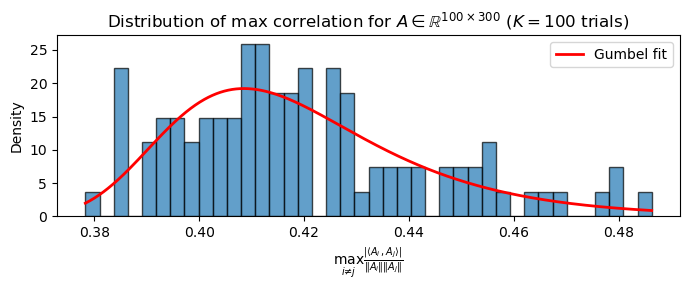

Running with m=100, n=300, K=500
Analyzing 500 Gaussian matrices of shape (100, 300)...
Max correlation values computed: 500


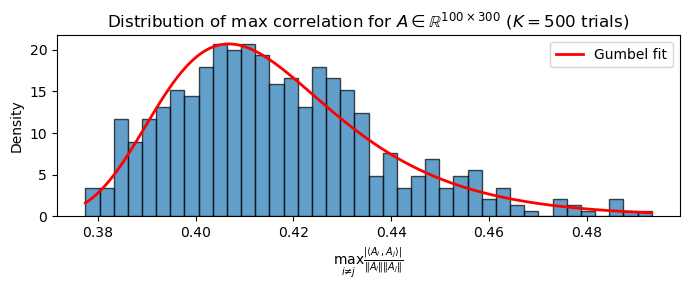

Running with m=100, n=300, K=1000
Analyzing 1000 Gaussian matrices of shape (100, 300)...
Max correlation values computed: 1000


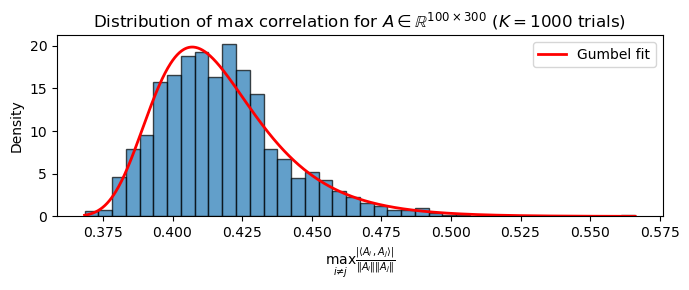

Running with m=100, n=300, K=10000
Analyzing 10000 Gaussian matrices of shape (100, 300)...
Max correlation values computed: 10000


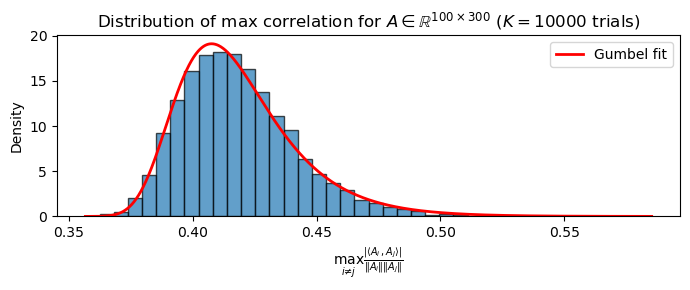

In [2]:
def plot_max_correlations(
    m: int,
    n: int,
    K: int = 1000,
    bins: int = 40,
    seed: int | None = None
) -> None:
    """Analyze and plot the distribution of maximum correlations
    between columns of a Gaussian random matrix A ∈ R^{m×n}.
    |<A_i, A_j>| / (||A_i|| ||A_j||)

    Args:
        m (int): Row dimension of the Gaussian matrix.
        n (int): Column dimension of the Gaussian matrix.
        K (int, optional): Number of trials (Matricies to generate). Defaults to 1000.
        bins (int, optional): Bins for histogram. Defaults to 40.
        seed (int | None, optional): Random seed for reproducibility. Defaults to None.
    """
    rng = np.random.default_rng(seed)
    max_correlations = []
    
    print(f"Analyzing {K} Gaussian matrices of shape ({m}, {n})...")
    
    for i in range(K):
        print(f"Processing matrix {i + 1}/{K}...", end="\r")
        
        # Generate a random Gaussian matrix
        A = rng.standard_normal((m, n))
        
        # Column 2-norms and avoid division by zero
        norms = np.linalg.norm(A, axis=0)
        if np.any(norms == 0):
            print("⚠️  Found a column with zero norm, skipping this matrix.")
            continue
        
        # Compute the Gram matrix
        G = A.T @ A # G[i, j] = <A_i, A_j>
        
        # Outer product of norms (||A_i|| * ||A_j||)
        norm_products = np.outer(norms, norms)
        
        # Element-wise division for correlation
        correlation_matrix = G / norm_products
        
        # lower triangular part of the correlation matrix without the diagonal 
        # (i != j, and i < j, cause its symmetric)
        # finds the maximum absolute correlation and appends it to the list
        lower_triangular = np.tril(correlation_matrix, k=-1)
        max_corr = np.max(np.abs(lower_triangular))
        
        max_correlations.append(max_corr)
    
    print(f"Max correlation values computed: {len(max_correlations)}")
    
    # fit Gumbel distribution to the data
    params = gumbel_r.fit(max_correlations)

    # values for the fitted curve
    x = np.linspace(min(max_correlations), max(max_correlations), 1000)
    pdf = gumbel_r.pdf(x, *params)
    
    # Plotting the distribution of maximum correlations
    plt.figure(figsize=(7, 3))
    plt.hist(max_correlations, bins=bins, density=True, edgecolor="black", alpha=0.7)
    plt.plot(x, pdf, color='red', lw=2, label="Gumbel fit")
    plt.title(f"Distribution of max correlation for $A \\in \\mathbb{{R}}^{{{m}\\times{n}}}$ ($K={K}$ trials)")
    plt.xlabel(r"$\max_{i \neq j} \frac{|\langle A_i, A_j \rangle|}{\|A_i\| \|A_j\|}$")
    plt.ylabel("Density")
    plt.tight_layout()
    plt.legend()
    plt.savefig(f"../docs/images/max_corr_k{K}_m{m}_x_n{n}.png", dpi=200)
    plt.show()


def main() -> None:
    """
    Main function to run the experiment described in the problem.
    """
    # parameters for the Gaussian matrix
    # m=rows, n=columns, K=trials
    m = 100
    n = 300
    Ks = [100, 500, 1000, 10000]
    
    seed = 42

    for K in Ks:
        print(f"Running with m={m}, n={n}, K={K}")
        plot_max_correlations(m=m, n=n, K=K, seed=seed)


if __name__ == "__main__":
    main()

Running with m=100, n=300, K=100
Analyzing 100 Gaussian matrices of shape (100, 300) using parallel processing...


Parallel computation finished in 0.20 seconds.


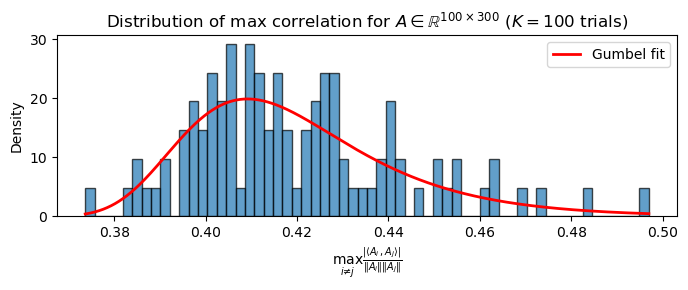

Running with m=100, n=300, K=500
Analyzing 500 Gaussian matrices of shape (100, 300) using parallel processing...
Parallel computation finished in 0.33 seconds.


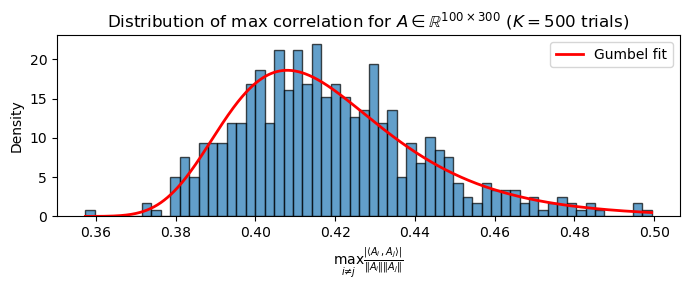

Running with m=100, n=300, K=1000
Analyzing 1000 Gaussian matrices of shape (100, 300) using parallel processing...
Parallel computation finished in 0.49 seconds.


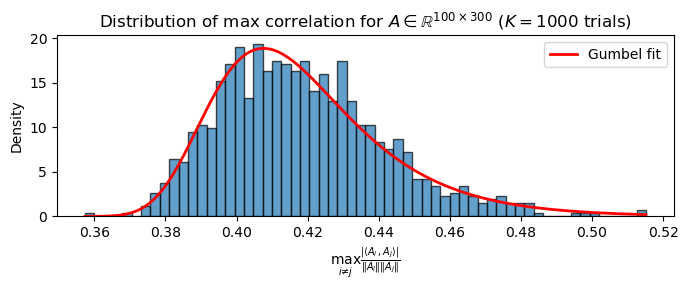

Running with m=100, n=300, K=10000
Analyzing 10000 Gaussian matrices of shape (100, 300) using parallel processing...
Parallel computation finished in 3.52 seconds.


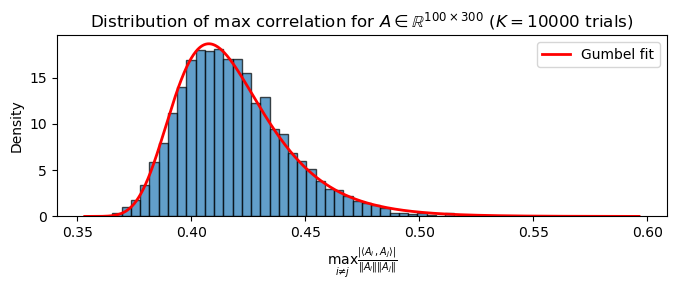

Running with m=100, n=300, K=100000
Analyzing 100000 Gaussian matrices of shape (100, 300) using parallel processing...
Parallel computation finished in 32.52 seconds.


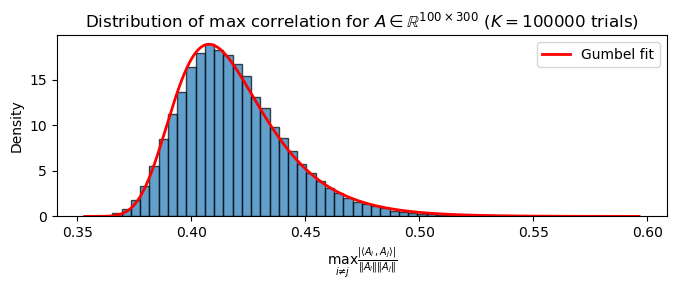

In [3]:
# Parallelized Version:

# worker function (single iteration)
def compute_one_max_corr(seed: int, m: int, n: int) -> float:
    """Computes the max correlation for a single matrix."""
    # random number generator with a unique seed for each worker
    rng = np.random.default_rng(seed)
    
    # Generate a random Gaussian matrix
    A = rng.standard_normal((m, n))
    
    # Column 2-norms and avoid division by zero
    norms = np.linalg.norm(A, axis=0)
    if np.any(norms == 0):
        print("⚠️  Found a column with zero norm, skipping this matrix.")
        return np.nan # returns NaN to filter out later
    
    # Compute the Gram matrix
    G = A.T @ A # G[i, j] = <A_i, A_j>
    
    # Outer product of norms (||A_i|| * ||A_j||)
    norm_products = np.outer(norms, norms)
    
    # Element-wise division for correlation
    correlation_matrix = G / norm_products
    
    # lower triangular part of the correlation matrix without the diagonal 
    # (i != j, and i < j, cause its symmetric)
    # finds the maximum absolute correlation and appends it to the list
    indices = np.tril_indices(n, k=-1)
    max_corr = np.max(np.abs(correlation_matrix[indices]))
    
    return max_corr

def plot_max_correlations_parallel(m: int, n: int, K: int, bins: int, seed: int):
    """
    Analyzes and plots the distribution using parallel processing.
    """
    print(f"Analyzing {K} Gaussian matrices of shape ({m}, {n}) using parallel processing...")
    
    # Create a Pool of workers (uses all available CPU cores by default)
    # we create a list of unique seeds for each worker to ensure true randomness
    rng = np.random.default_rng(seed)
    seeds = rng.integers(low=0, high=2**32-1, size=K)
    
    # args for each worker (starmap)
    args = [(s, m, n) for s in seeds]

    start_time = time.time()
    with Pool() as pool:
        # map the worker function across the arguments
        results = pool.starmap(compute_one_max_corr, args)
    end_time = time.time()

    print(f"Parallel computation finished in {end_time - start_time:.2f} seconds.")

    # filter out potential NaN results
    max_correlations = [r for r in results if not np.isnan(r)]
    
    # fit Gumbel distribution to the data
    params = gumbel_r.fit(max_correlations)

    # values for the fitted curve
    x = np.linspace(min(max_correlations), max(max_correlations), 1000)
    pdf = gumbel_r.pdf(x, *params)
    
    # Plotting the distribution of maximum correlations and the fitted Gumbel distribution
    plt.figure(figsize=(7, 3))
    plt.hist(max_correlations, bins=bins, density=True, edgecolor="black", alpha=0.7)
    plt.plot(x, pdf, color='red', lw=2, label="Gumbel fit")
    plt.title(f"Distribution of max correlation for $A \\in \\mathbb{{R}}^{{{m}\\times{n}}}$ ($K={K}$ trials)")
    plt.xlabel(r"$\max_{i \neq j} \frac{|\langle A_i, A_j \rangle|}{\|A_i\| \|A_j\|}$")
    plt.ylabel("Density")
    plt.tight_layout()
    plt.legend()
    plt.savefig(f"../docs/images/max_corr_k{K}_m{m}_x_n{n}.png", dpi=200)
    plt.show()

def main():
    m = 100
    n = 300
    Ks = [100, 500, 1000, 10000, 100000]
    bins = 60
    seed = 123

    for K in Ks:
        print(f"Running with m={m}, n={n}, K={K}")
        plot_max_correlations_parallel(m=m, n=n, K=K, bins=bins, seed=seed)

if __name__ == "__main__":
    main()

---

item d)

Testing dependence on K...
Testing dependence on n...
Testing dependence on m...


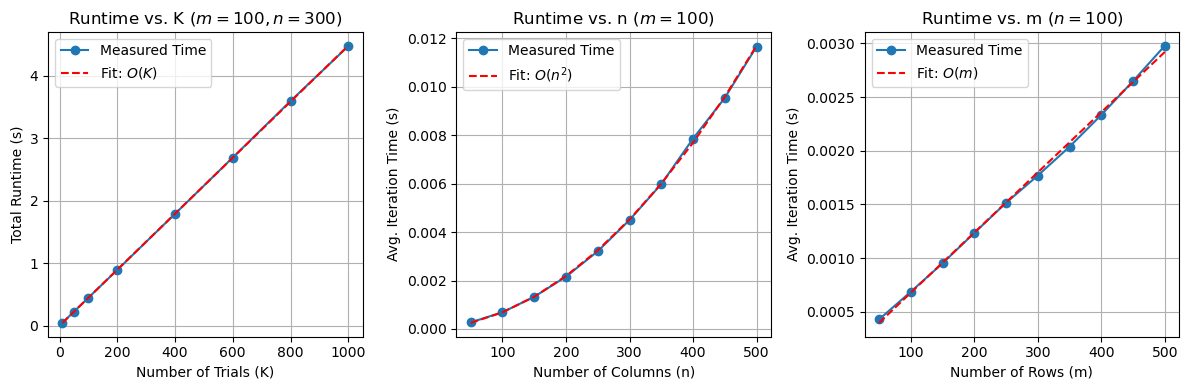

In [4]:
def time_single_iteration(m: int, n: int, seed: int = 727) -> float:
    """Times the core computation for a single matrix."""
    start_time = time.time()
    
    _ = compute_one_max_corr(seed, m, n)
    
    end_time = time.time()
    return end_time - start_time

def run_complexity_analysis():
    # Dependence on K
    # (we expect linear scaling)
    print("Testing dependence on K...")
    m, n = 100, 300
    k_values = [10, 50, 100, 200, 400, 600, 800, 1000]
    k_times = []
    for K in k_values:
        start_t = time.time()
        # A simplified loop for timing
        for _ in range(K):
            time_single_iteration(seed=727, m=m, n=n)
        end_t = time.time()
        k_times.append(end_t - start_t)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.plot(k_values, k_times, 'o-', label='Measured Time')
    # Fit a linear curve to show the trend
    coeffs = np.polyfit(k_values, k_times, 1)
    p = np.poly1d(coeffs)
    plt.plot(k_values, p(k_values), 'r--', label=f'Fit: $O(K)$')
    plt.xlabel('Number of Trials (K)')
    plt.ylabel('Total Runtime (s)')
    plt.title('Runtime vs. K ($m=100, n=300$)')
    plt.grid(True)
    plt.legend()

    # Dependence on n
    # (we expect quadratic scaling: O(n^2))
    print("Testing dependence on n...")
    m_fixed, k_fixed = 100, 50 # run 50x and take average
    n_values = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
    n_times = []
    for n_val in n_values:
        avg_time = np.mean([time_single_iteration(m_fixed, n_val, seed=i) for i in range(k_fixed)])
        n_times.append(avg_time)

    plt.subplot(1, 3, 2)
    plt.plot(n_values, n_times, 'o-', label='Measured Time')
    # Fit a quadratic curve to show the trend
    coeffs = np.polyfit(n_values, n_times, 2)
    p = np.poly1d(coeffs)
    plt.plot(n_values, p(n_values), 'r--', label=f'Fit: $O(n^{2}$)')
    plt.xlabel('Number of Columns (n)')
    plt.ylabel('Avg. Iteration Time (s)')
    plt.title('Runtime vs. n ($m=100$)')
    plt.grid(True)
    plt.legend()

    # Dependence on m
    # (We expect linear scaling: O(m))
    print("Testing dependence on m...")
    n_fixed, k_fixed = 100, 50 # run 50x and take average
    m_values = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
    m_times = []
    for m_val in m_values:
        avg_time = np.mean([time_single_iteration(m_val, n_fixed, seed=i) for i in range(k_fixed)])
        m_times.append(avg_time)

    plt.subplot(1, 3, 3)
    plt.plot(m_values, m_times, 'o-', label='Measured Time')
    # Fit a linear curve
    coeffs = np.polyfit(m_values, m_times, 1)
    p = np.poly1d(coeffs)
    plt.plot(m_values, p(m_values), 'r--', label=f'Fit: $O(m)$')
    plt.xlabel('Number of Rows (m)')
    plt.ylabel('Avg. Iteration Time (s)')
    plt.title('Runtime vs. m ($n=100$)')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.savefig("../docs/images/complexity_analysis.png", dpi=200)
    plt.show()

if __name__ == '__main__':
    run_complexity_analysis()

Running simulation for K=10000 to show convergence...


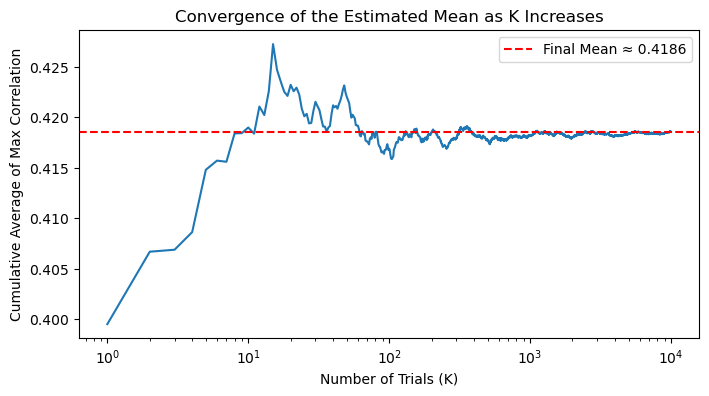

In [5]:
def plot_mean_convergence(m=100, n=300, K_max=10000, seed=727):
    """
    Shows how the estimated mean converges as K increases.
    """
    print(f"Running simulation for K={K_max} to show convergence...")
    # First, generate all the data
    rng = np.random.default_rng(seed)
    max_correlations = []
    
    seeds = rng.integers(low=0, high=2**32-1, size=K_max)
    
    for i in range(K_max):
        print(f"Processing matrix {i + 1}/{K_max}...", end="\r")
        max_corr = compute_one_max_corr(seeds[i], m, n)
        max_correlations.append(max_corr)
    
    # Calculate the running average
    k_values = np.arange(1, K_max + 1)
    running_avg = np.cumsum(max_correlations) / k_values
    
    # Plotting
    plt.figure(figsize=(8, 4))
    plt.plot(k_values, running_avg)
    plt.xscale('log')
    plt.xlabel('Number of Trials (K)')
    plt.ylabel('Cumulative Average of Max Correlation')
    plt.title('Convergence of the Estimated Mean as K Increases')
    #plt.grid(True, which="both", ls="--")
    # Add a line for the final converged value
    final_mean = running_avg[-1]
    plt.axhline(y=final_mean, color='r', linestyle='--', label=f'Final Mean ≈ {final_mean:.4f}')
    plt.legend()
    plt.savefig("../docs/images/complexity_mean_convergence.png", dpi=200)
    plt.show()

if __name__ == '__main__':
    plot_mean_convergence()

Running simulation for K=100000 to show convergence using parallel processing...
Parallel computation finished in 33.04 seconds.


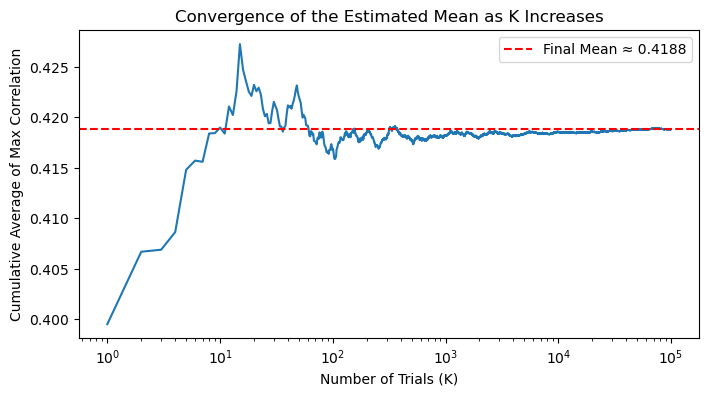

In [6]:
def plot_mean_convergence_parallel(m=100, n=300, K_max=100000, seed=727):
    """
    Shows how the estimated mean converges as K increases using parallel processing.
    """
    print(f"Running simulation for K={K_max} to show convergence using parallel processing...")
    
    # Create a Pool of workers (uses all available CPU cores by default)
    # we create a list of unique seeds for each worker to ensure true randomness
    rng = np.random.default_rng(seed)
    seeds = rng.integers(low=0, high=2**32-1, size=K_max)
    
    # args for each worker (starmap)
    args = [(s, m, n) for s in seeds]

    start_time = time.time()
    with Pool() as pool:
        # map the worker function across the arguments
        results = pool.starmap(compute_one_max_corr, args)
    end_time = time.time()

    print(f"Parallel computation finished in {end_time - start_time:.2f} seconds.")
    
    # Filter out NaN values
    max_correlations = [corr for corr in results if not np.isnan(corr)]
    
    # Calculate the running average
    k_values = np.arange(1, len(max_correlations) + 1)
    running_avg = np.cumsum(max_correlations) / k_values
    
    # Plotting
    plt.figure(figsize=(8, 4))
    plt.plot(k_values, running_avg)
    plt.xscale('log')
    plt.xlabel('Number of Trials (K)')
    plt.ylabel('Cumulative Average of Max Correlation')
    plt.title('Convergence of the Estimated Mean as K Increases')
    #plt.grid(True, which="both", ls="--")
    # Add a line for the final converged value
    final_mean = running_avg[-1]
    plt.axhline(y=final_mean, color='r', linestyle='--', label=f'Final Mean ≈ {final_mean:.4f}')
    plt.legend()
    plt.savefig("../docs/images/complexity_mean_convergence_parallel.png", dpi=200)
    plt.show()

if __name__ == '__main__':
    plot_mean_convergence_parallel()

---

item e)

Analyzing 2500 Gaussian matrices of shape (100, 100) using parallel processing...
Parallel computation finished in 0.31 seconds.


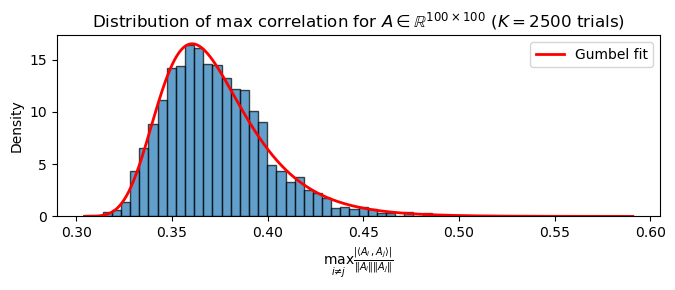

Analyzing 2500 Gaussian matrices of shape (100, 300) using parallel processing...
Parallel computation finished in 1.03 seconds.


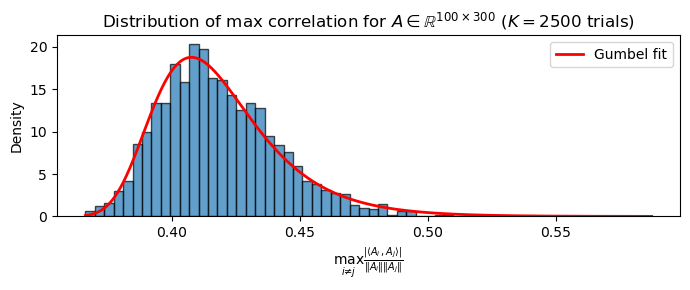

Analyzing 2500 Gaussian matrices of shape (200, 200) using parallel processing...
Parallel computation finished in 0.88 seconds.


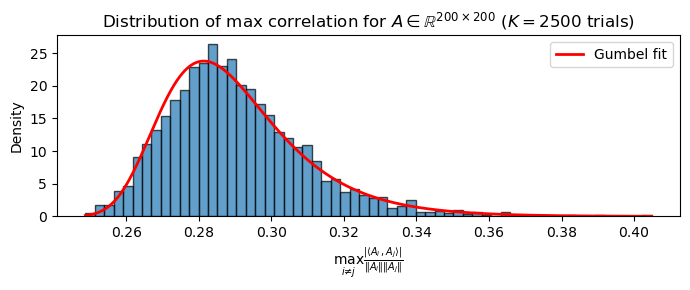

Analyzing 2500 Gaussian matrices of shape (200, 600) using parallel processing...
Parallel computation finished in 5.61 seconds.


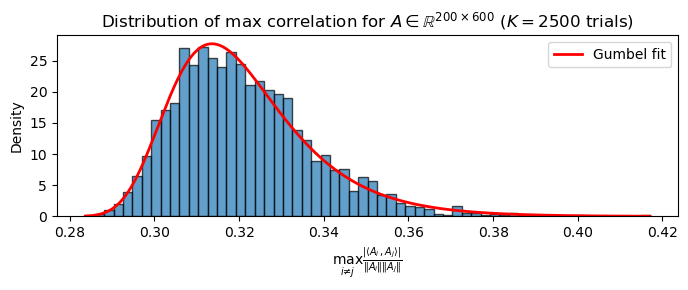

Analyzing 2500 Gaussian matrices of shape (500, 500) using parallel processing...
Parallel computation finished in 10.08 seconds.


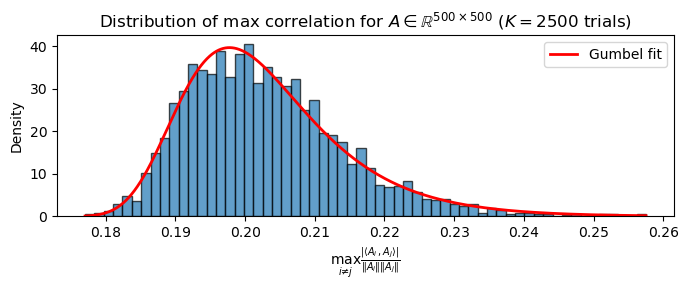

Analyzing 2500 Gaussian matrices of shape (500, 1500) using parallel processing...
Parallel computation finished in 162.12 seconds.


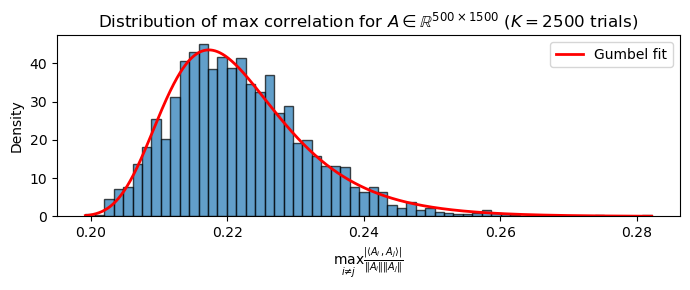

Analyzing 2500 Gaussian matrices of shape (1000, 1000) using parallel processing...
Parallel computation finished in 176.91 seconds.


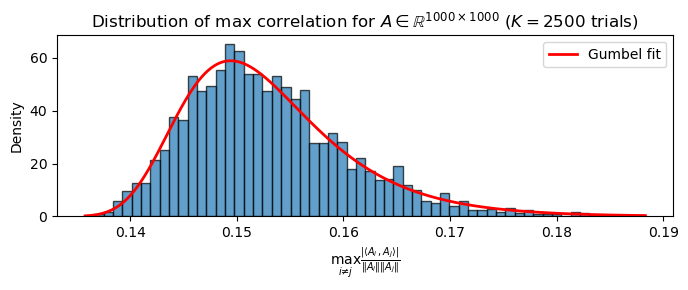

Analyzing 2500 Gaussian matrices of shape (1000, 3000) using parallel processing...
Parallel computation finished in 1743.87 seconds.


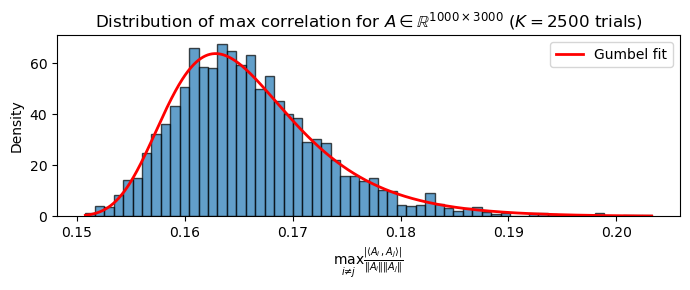

In [7]:
def main():
    # (m, n) pairs to analyze
    mn_pairs = [
        (100, 100), (100, 300),
        (200, 200), (200, 600),
        (500, 500), (500, 1500),
        (1000, 1000), (1000, 3000)
    ]
    # fixed number of trials and bins
    K = 2500 # good enough for convergence
    bins = 60
    seed = 727

    for m, n in mn_pairs:
        plot_max_correlations_parallel(m=m, n=n, K=K, bins=bins, seed=seed)

if __name__ == "__main__":
    main()